<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [127]:
data = pd.read_csv('train.csv')
data.shape
train = data.iloc[0:20,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [72]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

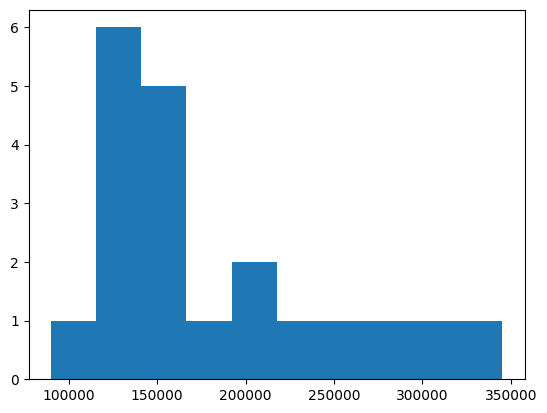

In [73]:
# plot hist
plt.hist(train['SalePrice'])

In [74]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 38)

In [75]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
# cast to list
cols = cols.tolist()
cols.append('1stFlrSF')
cols.append('GarageArea')
cols.append('TotalBsmtSF')
cols.append('GrLivArea')
#cols.append('OverallQual')
print(cols)

['SalePrice', 'OverallQual', 'MasVnrArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GrLivArea']


In [76]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea,1stFlrSF,GarageArea,TotalBsmtSF,GrLivArea
0,7,196.0,856,548,856,1710
1,6,0.0,1262,460,1262,1262
2,7,162.0,920,608,920,1786
3,7,0.0,961,642,756,1717
4,8,350.0,1145,836,1145,2198
5,5,0.0,796,480,796,1362
6,8,186.0,1694,636,1686,1694
7,7,240.0,1107,484,1107,2090
8,7,0.0,1022,468,952,1774
9,5,0.0,1077,205,991,1077


In [77]:
# build Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [78]:
# How good is the model
model.score(X,Y)


0.857988260267899

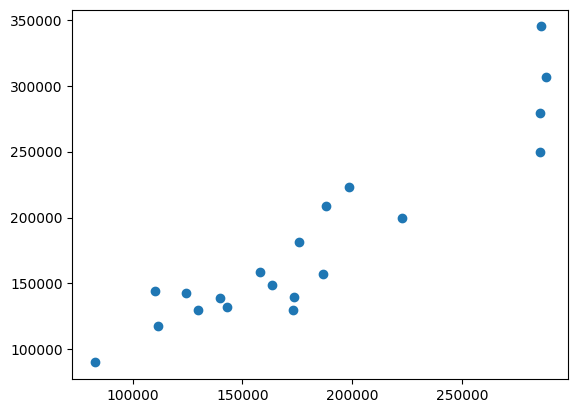

In [79]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [129]:
# delete NaN values
# data = data.dropna()

# look for errors (sale price of 1bil)

# remove sale prices above 1 billion
# data = data[data['SalePrice'] < 1000000]

# remove outliers
# data = data[data['GrLivArea'] < 4000]

# remove IDs that have NaN values in the data
data = data.dropna(subset=['Id'])






In [147]:
# create test data 
#data = data.dropna()
test = data.iloc[20:len(data)-1,:]

# set columns and cast to list
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols = cols.tolist()
cols.append('1stFlrSF')
cols.append('GarageArea')
cols.append('TotalBsmtSF')
cols.append('GrLivArea')

# test data 
X_test = test[cols]
Y_test = test['SalePrice']
#Y_test = Y_test[~X_test.isnull()]
X_test = X_test.dropna()

X_test = X_test.drop(['SalePrice'], axis = 1)

# drop rows that have NaN values


# drop NaN values
#X_test = X_test.dropna()
X_test



TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [141]:
# create a pandas dataframe with house ID and predictions
test.head()
lr = linear_model.LinearRegression()
model = lr.fit(X_test,Y_test)
predictions = model.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = test['Id'].values
submission['SalePrice'] = predictions
submission.head()

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by LinearRegression.

In [82]:
# turn submission into a csv file
submission.to_csv('submission.csv', index=False)